In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
train_df = pd.read_csv('./datasets/KOSDAQ_TRAIN_DATA.csv', index_col=0)
train_df = train_df.iloc[:,3:]

In [3]:
X_train = train_df.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)
X_train_concat = train_df[['산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기']]
y_train = train_df[['label']]

In [4]:
test_df = pd.read_csv('./datasets/KOSDAQ_TEST1_DATA.csv', index_col=0)
test_df = test_df.iloc[:,3:]

In [5]:
X_test = test_df.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)
X_test_concat = test_df[['산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기']]
y_test = test_df[['label']]

In [6]:
from sklearn.preprocessing import StandardScaler
# StandardScaler() Scaler객체 생성.
scaler = StandardScaler()
# 학습 데이터에 대해서 fit(), transform() 수행.
scaler.fit(X_train)
train_scaled_SS = scaler.transform(X_train)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_SS = pd.DataFrame(data = train_scaled_SS, columns=X_train.columns)

# 테스트 데이터에서는 다시 fit(), transform()이나 fit_transform()을 수행하지 않고 transform만 수행.
test_scaled_SS = scaler.transform(X_test)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_SS = pd.DataFrame(data = test_scaled_SS, columns=X_test.columns)

In [7]:
X_train_SS = pd.concat([X_train_SS, X_train_concat], axis=1)
X_test_SS = pd.concat([X_test_SS, X_test_concat], axis=1)

In [8]:
df_EDA = pd.concat([X_train_SS, X_test_SS], axis=0, ignore_index=True)
df_EDA

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,재무활동현금흐름,현금및현금성자산의증가,경영기간,상장기간,산업분류,기업생애주기_Shake-Out,기업생애주기_도입기,기업생애주기_성숙기,기업생애주기_성장기,기업생애주기_쇠퇴기
0,-0.284013,-0.285991,0.094896,-0.566484,-0.239962,-0.323833,1.116774,0.767052,0.198666,0.240735,...,-0.082103,-0.228713,-1.048633,0.013659,1,0,1,0,0,0
1,2.985761,-0.266582,4.196696,-0.637575,-0.136925,1.087489,-0.463134,-0.419129,-0.314005,-1.398371,...,1.269772,0.118896,-0.960414,0.180853,1,0,1,0,0,0
2,-0.408130,-0.045084,-0.695983,1.241383,0.409199,0.720414,0.364002,0.321993,0.230601,0.260266,...,-0.215776,1.093743,-0.872195,0.348047,1,0,0,0,0,1
3,-0.226699,0.592412,-0.848473,1.062455,-0.152255,-0.286754,0.023139,-0.115436,0.046172,-0.048227,...,-0.209000,-1.064574,-0.783976,0.515241,1,0,0,0,1,0
4,-0.424939,-0.280191,-0.442203,-0.274057,-0.099565,-0.368913,0.201672,-0.051783,-2.839304,-1.255820,...,-0.209168,-0.587073,-0.695758,0.682435,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,-0.149101,0.106559,-0.306455,0.281160,-0.127036,-0.386979,-0.385566,-0.113724,0.049705,0.064119,...,-0.097202,0.020177,-1.489726,-0.822311,1,0,0,0,1,0
8864,0.017455,-0.190882,-0.269725,0.998164,0.232767,-0.116694,-0.253543,-0.212973,0.094545,-0.042206,...,-1.699442,-0.299071,-0.431102,-1.156698,1,0,0,1,0,0
8865,-0.422620,-0.056488,-0.425764,-0.132443,0.138526,-0.381361,0.038613,-0.096993,0.062137,0.060138,...,-3.985065,-1.124686,-0.342883,-0.989504,1,0,0,1,0,0
8866,-0.523957,-0.225284,-0.745781,-0.349515,-0.741812,-0.268944,-0.090141,-0.124753,0.121122,0.121287,...,-0.520933,0.040022,2.656552,2.354374,0,1,0,0,0,0


## 정규성검정 (X_train+X_tset)
1. 샤피로 테스트

In [9]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(df_EDA):
    Shapi = []
    Shapi.append([col for col in df_EDA])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(df_EDA[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(df_EDA.iloc[:,:])

총자본증가율 Test-statistics : 0.7220707535743713, p-value : 0.0
유형자산증가율 Test-statistics : 0.41744178533554077, p-value : 0.0
유동자산증가율 Test-statistics : 0.7349200248718262, p-value : 0.0
비유동자산증가율 Test-statistics : 0.6214050650596619, p-value : 0.0
재고자산증가율 Test-statistics : 0.5284221172332764, p-value : 0.0
자기자본증가율 Test-statistics : 0.538870096206665, p-value : 0.0
매출액증가율 Test-statistics : 0.7476332187652588, p-value : 0.0
매출총이익증가율 Test-statistics : 0.46423161029815674, p-value : 0.0
당기순이익증가율 Test-statistics : 0.3271275758743286, p-value : 0.0
정상영업손익증가율 Test-statistics : 0.4536536931991577, p-value : 0.0
매출액총이익률 Test-statistics : 0.940065324306488, p-value : 0.0
매출액순이익률 Test-statistics : 0.3345710039138794, p-value : 0.0
총자본순이익률 Test-statistics : 0.8230185508728027, p-value : 0.0
자기자본순이익률 Test-statistics : 0.7204488515853882, p-value : 0.0
매출원가대매출액비율 Test-statistics : 0.8585542440414429, p-value : 0.0
영업비용대영업수익비율 Test-statistics : 0.3946153521537781, p-value : 0.0
기업순이익률 Test-statistics : 0.81

## 앤더슨

In [10]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(df_EDA):
    ander = []
    ander.append([col for col in df_EDA])
    for i in ander:
        for j in i:
            anderson_test = anderson(df_EDA[j], dist='norm')
            print(j,anderson_test)

Anderson(df_EDA)

총자본증가율 AndersonResult(statistic=646.2519713667025, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.03558958207547926, scale=1.0616183155652996)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
유형자산증가율 AndersonResult(statistic=1584.6361495886395, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.03507416954959796, scale=1.0659458722833048)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
유동자산증가율 AndersonResult(statistic=582.7572007122926, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.025937852021597776, scale=1.058555382617739)
 success: True
 message: '`anderson` successfully fit the distribution t

정규성검정 만족하는 컬럼 확인

In [11]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [12]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',X_train_SS)
normal_s

,normal


In [13]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',X_train_SS)
normal_a

,normal


In [14]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',X_train_SS)
normal_ks

,normal
0,유동자산구성비율
1,비유동자산구성비율
2,순운전자본비율


In [15]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',X_train_SS)
normal_jb

,normal


In [16]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',X_train_SS)
normal_n

,normal


## 1. 등분산 검정

In [17]:
df_등분산 = pd.concat([X_train_SS, y_train], axis=1)

df_등분산_1 = df_등분산.drop(columns=['label', '산업분류', '기업생애주기_Shake-Out',
       '기업생애주기_도입기', '기업생애주기_성숙기', '기업생애주기_성장기', '기업생애주기_쇠퇴기'], axis=1)

In [18]:
df_등분산_1

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,재고자산회전률,매출채권회전률,유형자산회전율,순운전자본회전률,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,현금및현금성자산의증가,경영기간,상장기간
0,-0.284013,-0.285991,0.094896,-0.566484,-0.239962,-0.323833,1.116774,0.767052,0.198666,0.240735,...,-0.195837,-0.803765,-0.348623,-0.421587,-0.484355,0.378090,-0.082103,-0.228713,-1.048633,0.013659
1,2.985761,-0.266582,4.196696,-0.637575,-0.136925,1.087489,-0.463134,-0.419129,-0.314005,-1.398371,...,-0.197682,-0.897423,-0.350883,-1.243705,-0.445273,-0.611348,1.269772,0.118896,-0.960414,0.180853
2,-0.408130,-0.045084,-0.695983,1.241383,0.409199,0.720414,0.364002,0.321993,0.230601,0.260266,...,-0.198514,-0.863082,-0.338832,-1.243705,-0.538959,1.173585,-0.215776,1.093743,-0.872195,0.348047
3,-0.226699,0.592412,-0.848473,1.062455,-0.152255,-0.286754,0.023139,-0.115436,0.046172,-0.048227,...,-0.200126,-0.895862,-0.357285,-0.982122,-0.354280,-0.032992,-0.209000,-1.064574,-0.783976,0.515241
4,-0.424939,-0.280191,-0.442203,-0.274057,-0.099565,-0.368913,0.201672,-0.051783,-2.839304,-1.255820,...,-0.198956,-0.858399,-0.359545,-0.627117,-0.287560,0.138552,-0.209168,-0.587073,-0.695758,0.682435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,-0.488830,-0.225973,-0.741162,-0.316366,-0.183392,-0.273317,-0.474806,-0.184330,0.042769,-0.207835,...,-0.037024,3.359328,-0.205520,3.688998,-0.224047,0.434033,-0.374043,-0.141612,2.215459,1.518404
6459,-0.430765,-0.318099,0.423535,-0.514775,-0.700339,-0.246157,-0.800097,-0.166378,0.280851,1.272358,...,-0.042379,3.713667,-0.244308,3.688998,-0.214108,0.576269,-0.394328,0.137008,2.303677,1.685598
6460,0.048859,-0.229463,-0.632432,0.131829,-0.487384,-0.230026,-0.738301,-0.228164,0.181134,-0.078748,...,-0.000895,3.415523,-0.271046,3.688998,-0.204644,0.040869,0.001631,-0.275185,2.391896,1.852792
6461,-0.301957,-0.282821,-0.127647,-0.305228,0.366151,-0.261493,-0.434652,-0.127248,0.071725,0.241051,...,-0.033282,3.452986,-0.277072,3.688998,-0.338798,0.359894,-0.205320,-0.213775,2.480115,2.019986


## MDA

In [19]:
Bad = df_등분산[df_등분산['label']== 1] #Existing Customer
Good = df_등분산[df_등분산['label']== 0] #Attrited Customer

In [20]:
df_등분산

,총자본증가율,유형자산증가율,유동자산증가율,비유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,매출총이익증가율,당기순이익증가율,정상영업손익증가율,...,현금및현금성자산의증가,경영기간,상장기간,산업분류,기업생애주기_Shake-Out,기업생애주기_도입기,기업생애주기_성숙기,기업생애주기_성장기,기업생애주기_쇠퇴기,label
0,-0.284013,-0.285991,0.094896,-0.566484,-0.239962,-0.323833,1.116774,0.767052,0.198666,0.240735,...,-0.228713,-1.048633,0.013659,1,0,1,0,0,0,0
1,2.985761,-0.266582,4.196696,-0.637575,-0.136925,1.087489,-0.463134,-0.419129,-0.314005,-1.398371,...,0.118896,-0.960414,0.180853,1,0,1,0,0,0,0
2,-0.408130,-0.045084,-0.695983,1.241383,0.409199,0.720414,0.364002,0.321993,0.230601,0.260266,...,1.093743,-0.872195,0.348047,1,0,0,0,0,1,0
3,-0.226699,0.592412,-0.848473,1.062455,-0.152255,-0.286754,0.023139,-0.115436,0.046172,-0.048227,...,-1.064574,-0.783976,0.515241,1,0,0,0,1,0,0
4,-0.424939,-0.280191,-0.442203,-0.274057,-0.099565,-0.368913,0.201672,-0.051783,-2.839304,-1.255820,...,-0.587073,-0.695758,0.682435,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,-0.488830,-0.225973,-0.741162,-0.316366,-0.183392,-0.273317,-0.474806,-0.184330,0.042769,-0.207835,...,-0.141612,2.215459,1.518404,0,0,0,1,0,0,0
6459,-0.430765,-0.318099,0.423535,-0.514775,-0.700339,-0.246157,-0.800097,-0.166378,0.280851,1.272358,...,0.137008,2.303677,1.685598,0,1,0,0,0,0,0
6460,0.048859,-0.229463,-0.632432,0.131829,-0.487384,-0.230026,-0.738301,-0.228164,0.181134,-0.078748,...,-0.275185,2.391896,1.852792,0,0,0,0,1,0,0
6461,-0.301957,-0.282821,-0.127647,-0.305228,0.366151,-0.261493,-0.434652,-0.127248,0.071725,0.241051,...,-0.213775,2.480115,2.019986,0,0,0,0,1,0,0


In [21]:
a = []
for i in df_등분산_1:
    lresult = stats.bartlett(Bad[i], Good[i])
    a.append([i,lresult[-1]])

In [22]:
pd.options.display.float_format = '{:.10f}'.format

In [23]:
a= pd.DataFrame(a)
a.columns=["피처값",'F-test']
a

,피처값,F-test
0,총자본증가율,0.0006124101
1,유형자산증가율,0.2052149119
2,유동자산증가율,0.0000355213
3,비유동자산증가율,0.0003601796
4,재고자산증가율,0.5371238188
5,자기자본증가율,0.0000000000
6,매출액증가율,0.0000000000
7,매출총이익증가율,0.0000000000
8,당기순이익증가율,0.0000000000
9,정상영업손익증가율,0.0413237811


In [24]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
    else:
        a.loc[i,"분산"] = "hetero"
a

,피처값,F-test,분산,T-test
0,총자본증가율,0.0006124101,hetero,
1,유형자산증가율,0.2052149119,homo,
2,유동자산증가율,0.0000355213,hetero,
3,비유동자산증가율,0.0003601796,hetero,
4,재고자산증가율,0.5371238188,homo,
5,자기자본증가율,0.0000000000,hetero,
6,매출액증가율,0.0000000000,hetero,
7,매출총이익증가율,0.0000000000,hetero,
8,당기순이익증가율,0.0000000000,hetero,
9,정상영업손익증가율,0.0413237811,hetero,


In [25]:
a["분산"] =''
a["T-test"] =""
for i in a.index:
    if a.loc[i,"F-test"]>=0.05:
        a.loc[i,"분산"] = "homo"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=True)       ## equal_var = True Student T-test
        a.loc[i,"T-test"] = result[-1]
    else:
        a.loc[i,"분산"] = "hetero"
        result = stats.ttest_ind(Bad[a.loc[i,"피처값"]], Good[a.loc[i,"피처값"]], equal_var=False)      ## equal_var = False Welchs T-Test
        a.loc[i,"T-test"] = result[-1]
a

,피처값,F-test,분산,T-test
0,총자본증가율,0.0006124101,hetero,0.0000000000
1,유형자산증가율,0.2052149119,homo,0.0038563739
2,유동자산증가율,0.0000355213,hetero,0.0000003144
3,비유동자산증가율,0.0003601796,hetero,0.0000040415
4,재고자산증가율,0.5371238188,homo,0.0000086515
5,자기자본증가율,0.0000000000,hetero,0.0000005830
6,매출액증가율,0.0000000000,hetero,0.0002416435
7,매출총이익증가율,0.0000000000,hetero,0.0060611965
8,당기순이익증가율,0.0000000000,hetero,0.0024278102
9,정상영업손익증가율,0.0413237811,hetero,0.0003312247


In [26]:
a.sort_values('T-test').head(20)

,피처값,F-test,분산,T-test
46,타인자본회전률,0.0000000000,hetero,0.0000000000
12,총자본순이익률,0.0000000000,hetero,0.0000000000
16,기업순이익률,0.0000000000,hetero,0.0000000000
47,매입채무회전률,0.0000000000,hetero,0.0000000000
22,1주당정상영업이익,0.0000000000,hetero,0.0000000000
53,순운전자본회전률,0.0000569769,hetero,0.0000000000
20,1주당순이익,0.0004880368,hetero,0.0000000000
13,자기자본순이익률,0.0000000000,hetero,0.0000000000
38,순운전자본비율,0.0000408691,hetero,0.0000000000
40,CASHFLOW대부채비율,0.0012437768,hetero,0.0000000000


In [27]:
a.sort_values('T-test')['피처값'].head(20).tolist()

['타인자본회전률',
 '총자본순이익률',
 '기업순이익률',
 '매입채무회전률',
 '1주당정상영업이익',
 '순운전자본회전률',
 '1주당순이익',
 '자기자본순이익률',
 '순운전자본비율',
 'CASHFLOW대부채비율',
 'CASHFLOW대총자본비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '영업활동현금흐름',
 '총자본회전률',
 '매출원가대매출액비율',
 '총자본증가율',
 '이자부담률',
 '매출액순이익률',
 '1주당CASHFLOW']

In [28]:
df_MDA = df_등분산[['타인자본회전률',
 '총자본순이익률',
 '기업순이익률',
 '매입채무회전률',
 '1주당정상영업이익',
 '순운전자본회전률',
 '1주당순이익',
 '자기자본순이익률',
 '순운전자본비율',
 'CASHFLOW대부채비율',
 'CASHFLOW대총자본비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '영업활동현금흐름',
 '총자본회전률',
 '매출원가대매출액비율',
 '총자본증가율',
 '이자부담률',
 '매출액순이익률',
 '1주당CASHFLOW']]

In [30]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_MDA)

,VIF Factor,features
0,968.6673912303,타인자본구성비율
1,959.2315312655,자기자본구성비율
2,324.4458926169,총자본순이익률
3,292.2185694791,기업순이익률
4,6.7670445191,총자본회전률
5,6.1397097045,순운전자본회전률
6,5.8982322279,타인자본회전률
7,5.2754868272,자기자본순이익률
8,4.0447538410,이자부담률
9,4.0266697479,순운전자본비율


In [31]:
MDA = list(vif(df_MDA)["features"])

## 2. Logit

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()

feature = df_등분산.drop(columns='label')
target = df_등분산[['label']]

logit = SelectFromModel(LogisticRegression())
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

In [33]:
lr_feature

['매출액총이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '기업순이익률',
 '1주당순이익',
 '1주당정상영업이익',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '당좌비율',
 '현금비율',
 '부채비율',
 '유동부채비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 '총자본회전률',
 '매입채무회전률',
 '당좌자산회전률',
 '영업활동현금흐름',
 '산업분류',
 '기업생애주기_도입기']

In [40]:
lr_feature = df_등분산[['매출액총이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '1주당순이익',
 '1주당정상영업이익',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '당좌비율',
 '현금비율',
 '유동부채비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 '총자본회전률',
 '매입채무회전률',
 '당좌자산회전률',
 '영업활동현금흐름',
 '산업분류',
 '기업생애주기_도입기']]

In [41]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(lr_feature)

,VIF Factor,features
0,15.7817130020,순운전자본비율
1,8.1910888213,유동자산구성비율
2,6.5981487077,총자본순이익률
3,6.5486446974,자기자본구성비율
4,6.3456595381,자기자본순이익률
5,5.8391608889,당좌자산회전률
6,4.9905141634,총자본회전률
7,4.8902579238,유동부채비율
8,3.4951738295,당좌비율
9,3.2461400773,1주당순이익


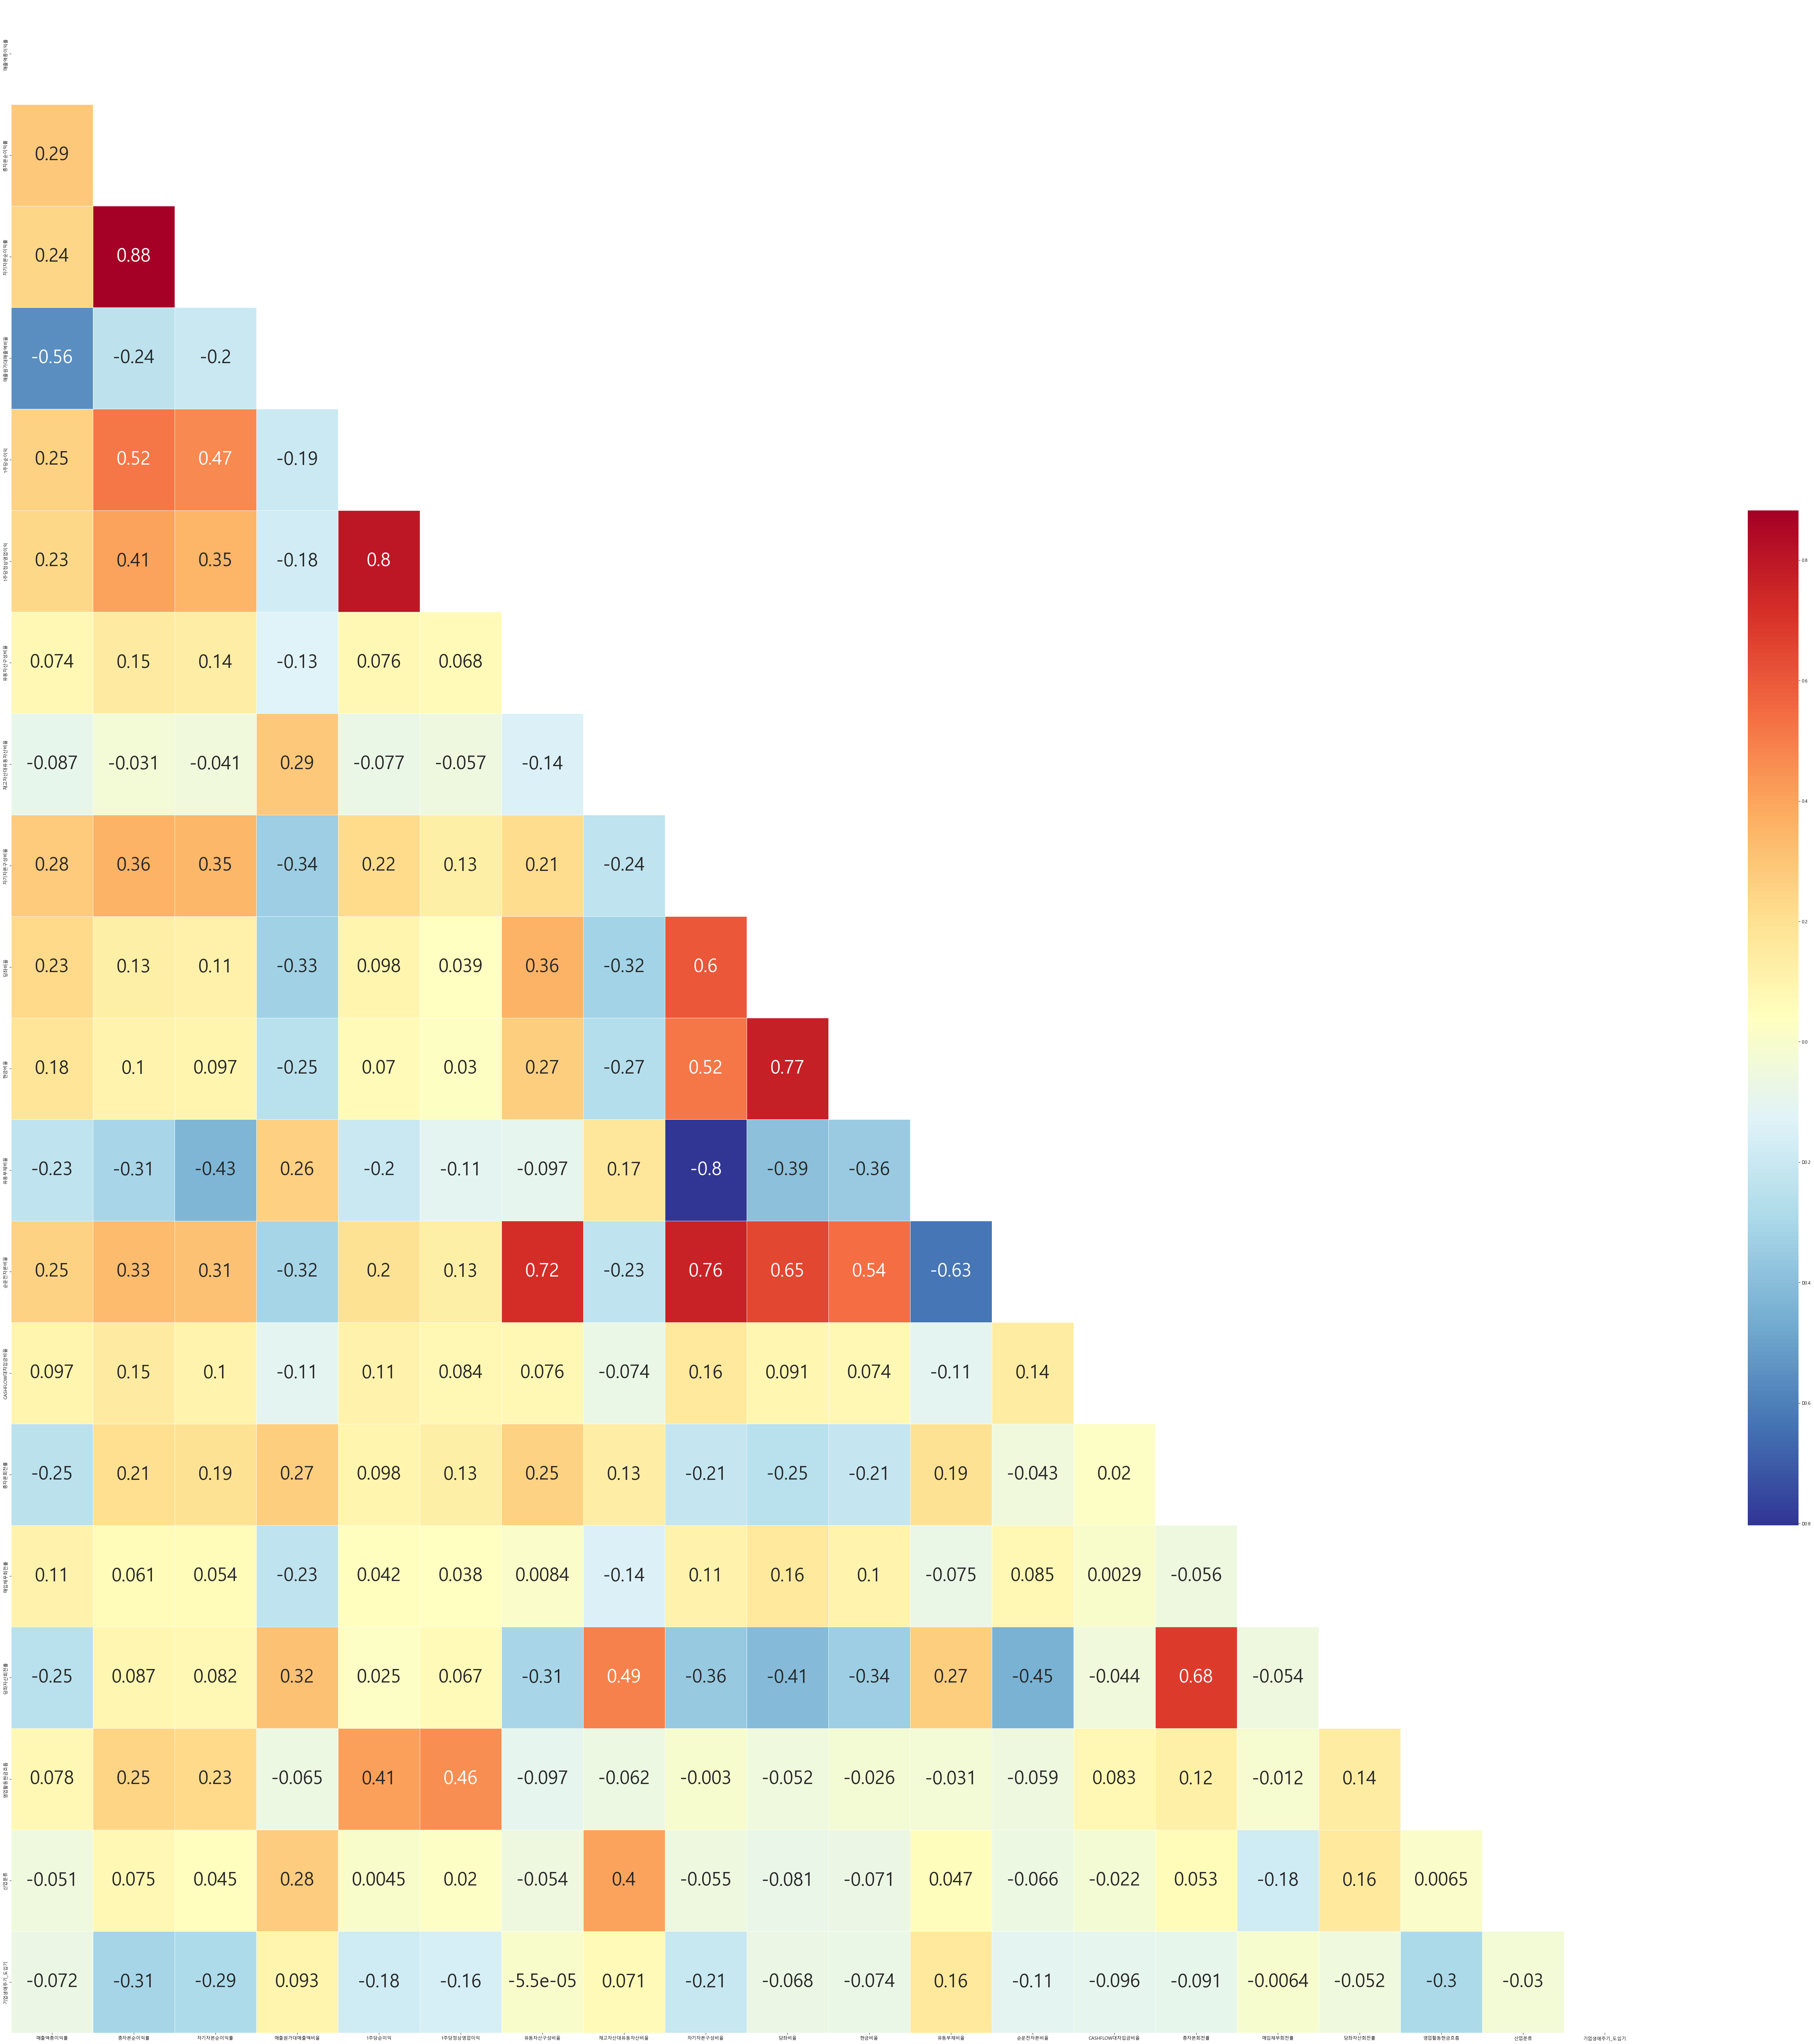

In [42]:
import numpy as np
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 40}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(lr_feature)

In [43]:
Logit = list(vif(lr_feature)["features"])

## 3. Embbeded Method

Lasso

In [54]:
lasso_best = LogisticRegression(C=0.088,penalty='l1',solver='liblinear').fit(X_train_SS, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train_SS.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,총자본증가율,-0.1334582674
1,유형자산증가율,-0.0365723442
9,정상영업손익증가율,0.0358499824
12,총자본순이익률,-0.4631146094
13,자기자본순이익률,-0.1700990374
14,매출원가대매출액비율,0.0894814651
15,영업비용대영업수익비율,0.0805917692
17,금융비용대총비용비율,0.0672630663
22,1주당정상영업이익,-0.0131294962
24,재고자산대유동자산비율,-0.1043693893


In [55]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 20 개


['총자본증가율',
 '유형자산증가율',
 '정상영업손익증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '1주당정상영업이익',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '당좌자산회전률',
 '매출채권회전률',
 '유형자산회전율',
 '순운전자본회전률',
 '투자활동현금흐름']

In [56]:
df_lasso = X_train_SS[['총자본증가율',
 '유형자산증가율',
 '정상영업손익증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '1주당정상영업이익',
 '재고자산대유동자산비율',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대차입금비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '당좌자산회전률',
 '매출채권회전률',
 '유형자산회전율',
 '순운전자본회전률',
 '투자활동현금흐름']]

In [57]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_lasso)

,VIF Factor,features
0,7.2181914232,당좌자산회전률
1,6.5222936725,총자본순이익률
2,4.8358228187,순운전자본회전률
3,4.7104543858,자기자본순이익률
4,3.9150544878,CASHFLOW대매출액비율
5,3.5613779134,순운전자본비율
6,3.4811891276,영업비용대영업수익비율
7,3.0036456296,자기자본구성비율
8,2.6885886330,CASHFLOW대총자본비율
9,2.1137443782,재고자산대유동자산비율


## 4. Filter Method

selectKBest : 각 피쳐와 타겟 사이의 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_selector = SelectKBest(f_classif, k=20)
f_classif_selector.fit(X_train_SS, y_train)

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = X_train_SS.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

,Feature,Support
0,총자본증가율,True
5,자기자본증가율,True
11,매출액순이익률,True
12,총자본순이익률,True
13,자기자본순이익률,True
15,영업비용대영업수익비율,True
16,기업순이익률,True
17,금융비용대총비용비율,True
20,1주당순이익,True
28,자기자본구성비율,True


In [59]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
print(len(list_kbest))
list_kbest

20


['총자본증가율',
 '자기자본증가율',
 '매출액순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '금융비용대총비용비율',
 '1주당순이익',
 '자기자본구성비율',
 '타인자본구성비율',
 '비유동비율',
 '부채비율',
 '유동부채비율',
 '순운전자본비율',
 '차입금비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '타인자본회전률',
 '순운전자본회전률']

In [60]:
df_kbest = X_train_SS[['총자본증가율',
 '자기자본증가율',
 '매출액순이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '금융비용대총비용비율',
 '1주당순이익',
 '자기자본구성비율',
 '타인자본구성비율',
 '비유동비율',
 '부채비율',
 '유동부채비율',
 '순운전자본비율',
 '차입금비율',
 'CASHFLOW대총자본비율',
 'CASHFLOW대매출액비율',
 '타인자본회전률',
 '순운전자본회전률']]

In [63]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_kbest)

,VIF Factor,features
0,1100.6081629762,타인자본구성비율
1,1080.8217098271,자기자본구성비율
2,417.1276256054,총자본순이익률
3,387.3089629056,기업순이익률
4,39.3522405283,부채비율
5,19.8834491882,유동부채비율
6,14.6009514280,비유동비율
7,10.5566570054,순운전자본비율
8,7.8508108593,차입금비율
9,6.6397462583,자기자본순이익률


In [64]:
kbest = list(vif(df_kbest)["features"])

## 8. 중복 2번 Feature

In [65]:
# MDA_col
# Logit_col
# list_stepwise
# lasso_features
# list_kbest

list_MDA = list(MDA)
list_lr = list(Logit)
list_lasso = list(lasso)
list_kbest = list(kbest)
list_col_all = df_EDA.columns

In [66]:
def func_MDA(x):
    if x in list_MDA:
        return 1
    else:
        return 0
    
def func_lr(x):
    if x in list_lr:
        return 1
    else:
        return 0


def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [67]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['MDA'] = list_col_all.map(func_MDA)
feature_counts['Logit'] = list_col_all.map(func_lr)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["MDA"]+feature_counts['Logit']+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 24


,Feature,MDA,Logit,lasso,kbest,total
0,총자본증가율,1,0,1,1,3
11,매출액순이익률,1,0,0,1,2
12,총자본순이익률,1,1,1,1,4
13,자기자본순이익률,1,1,1,1,4
14,매출원가대매출액비율,1,1,1,0,3
15,영업비용대영업수익비율,0,0,1,1,2
16,기업순이익률,1,0,0,1,2
17,금융비용대총비용비율,0,0,1,1,2
20,1주당순이익,1,1,0,1,3
22,1주당정상영업이익,1,1,1,0,3


In [68]:
df_fs = X_train_SS[list_feature_final]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1056.2457641534,타인자본구성비율
1,1018.3566352386,자기자본구성비율
2,393.8074988447,총자본순이익률
3,363.0767798136,기업순이익률
4,9.8610117420,순운전자본회전률
5,7.2095794408,당좌자산회전률
6,6.9899962389,총자본회전률
7,6.3989617631,자기자본순이익률
8,5.5361148089,매출액순이익률
9,5.0879130692,순운전자본비율


<AxesSubplot: >

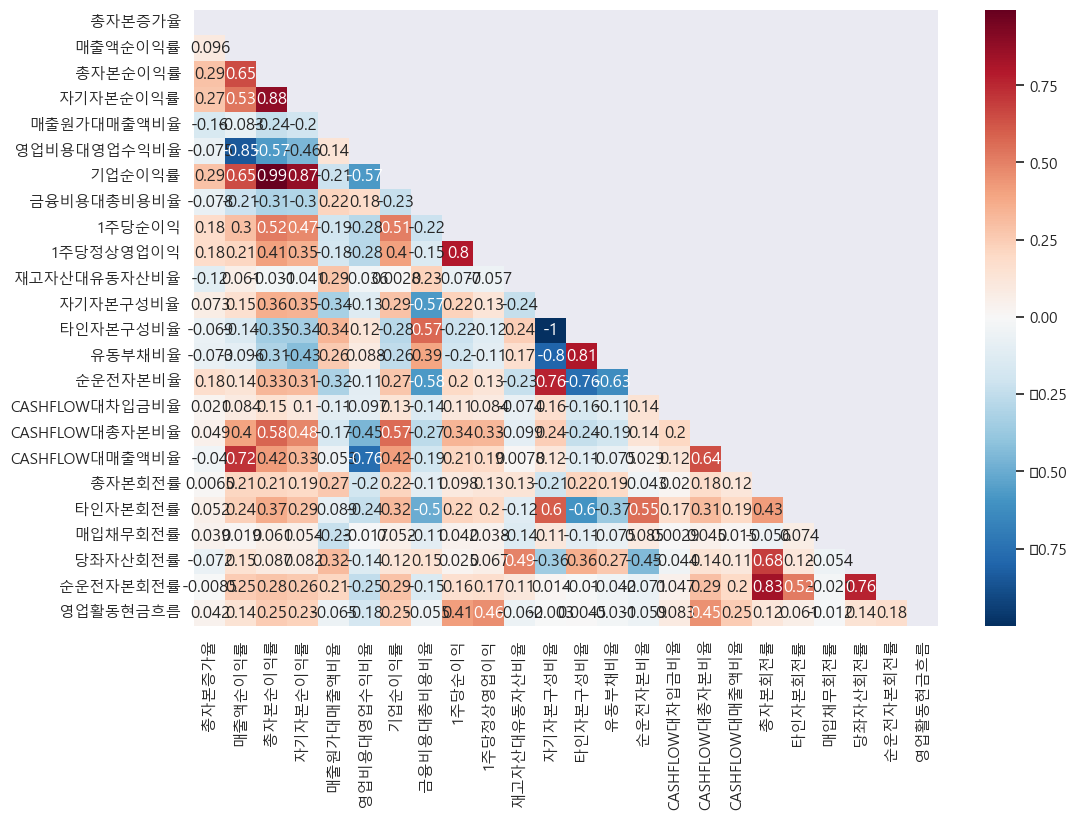

In [69]:
df_fs_cor = df_fs.corr(method='pearson')

sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(df_fs_cor, xticklabels=df_fs_cor.columns, yticklabels=df_fs_cor.columns, cmap='RdBu_r', annot=True, mask=np.triu(df_fs_cor))

## 8. 중복 3번 Feature

In [70]:
# MDA_col
# Logit_col
# list_stepwise
# lasso_features
# list_kbest

list_MDA = list(MDA)
list_lr = list(Logit)
list_lasso = list(lasso)
list_kbest = list(kbest)
list_col_all = df_EDA.columns

In [71]:
def func_MDA(x):
    if x in list_MDA:
        return 1
    else:
        return 0
    
def func_lr(x):
    if x in list_lr:
        return 1
    else:
        return 0


def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [72]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['MDA'] = list_col_all.map(func_MDA)
feature_counts['Logit'] = list_col_all.map(func_lr)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["MDA"]+feature_counts['Logit']+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 10


,Feature,MDA,Logit,lasso,kbest,total
0,총자본증가율,1,0,1,1,3
12,총자본순이익률,1,1,1,1,4
13,자기자본순이익률,1,1,1,1,4
14,매출원가대매출액비율,1,1,1,0,3
20,1주당순이익,1,1,0,1,3
22,1주당정상영업이익,1,1,1,0,3
28,자기자본구성비율,1,1,1,1,4
38,순운전자본비율,1,1,1,1,4
42,CASHFLOW대총자본비율,1,0,1,1,3
53,순운전자본회전률,1,0,1,1,3


In [73]:
feature_final['Feature'].to_list()

['총자본증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '1주당순이익',
 '1주당정상영업이익',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '순운전자본회전률']

In [74]:
df_fs = X_train_SS[['총자본증가율',
 '총자본순이익률',
 '자기자본순이익률',
 '매출원가대매출액비율',
 '1주당순이익',
 '1주당정상영업이익',
 '자기자본구성비율',
 '순운전자본비율',
 'CASHFLOW대총자본비율',
 '순운전자본회전률']]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(df_fs.values, i) for i in range(df_fs.shape[1])]
vif["features"] = df_fs.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,5.6989731211,총자본순이익률
1,4.5957383355,자기자본순이익률
2,3.2253603327,1주당순이익
3,2.9029087076,1주당정상영업이익
4,2.6441425508,자기자본구성비율
5,2.5677235373,순운전자본비율
6,1.6484742215,CASHFLOW대총자본비율
7,1.2890185275,매출원가대매출액비율
8,1.2723304130,순운전자본회전률
9,1.1687407248,총자본증가율


<AxesSubplot: title={'center': 'Correlation of Features'}>

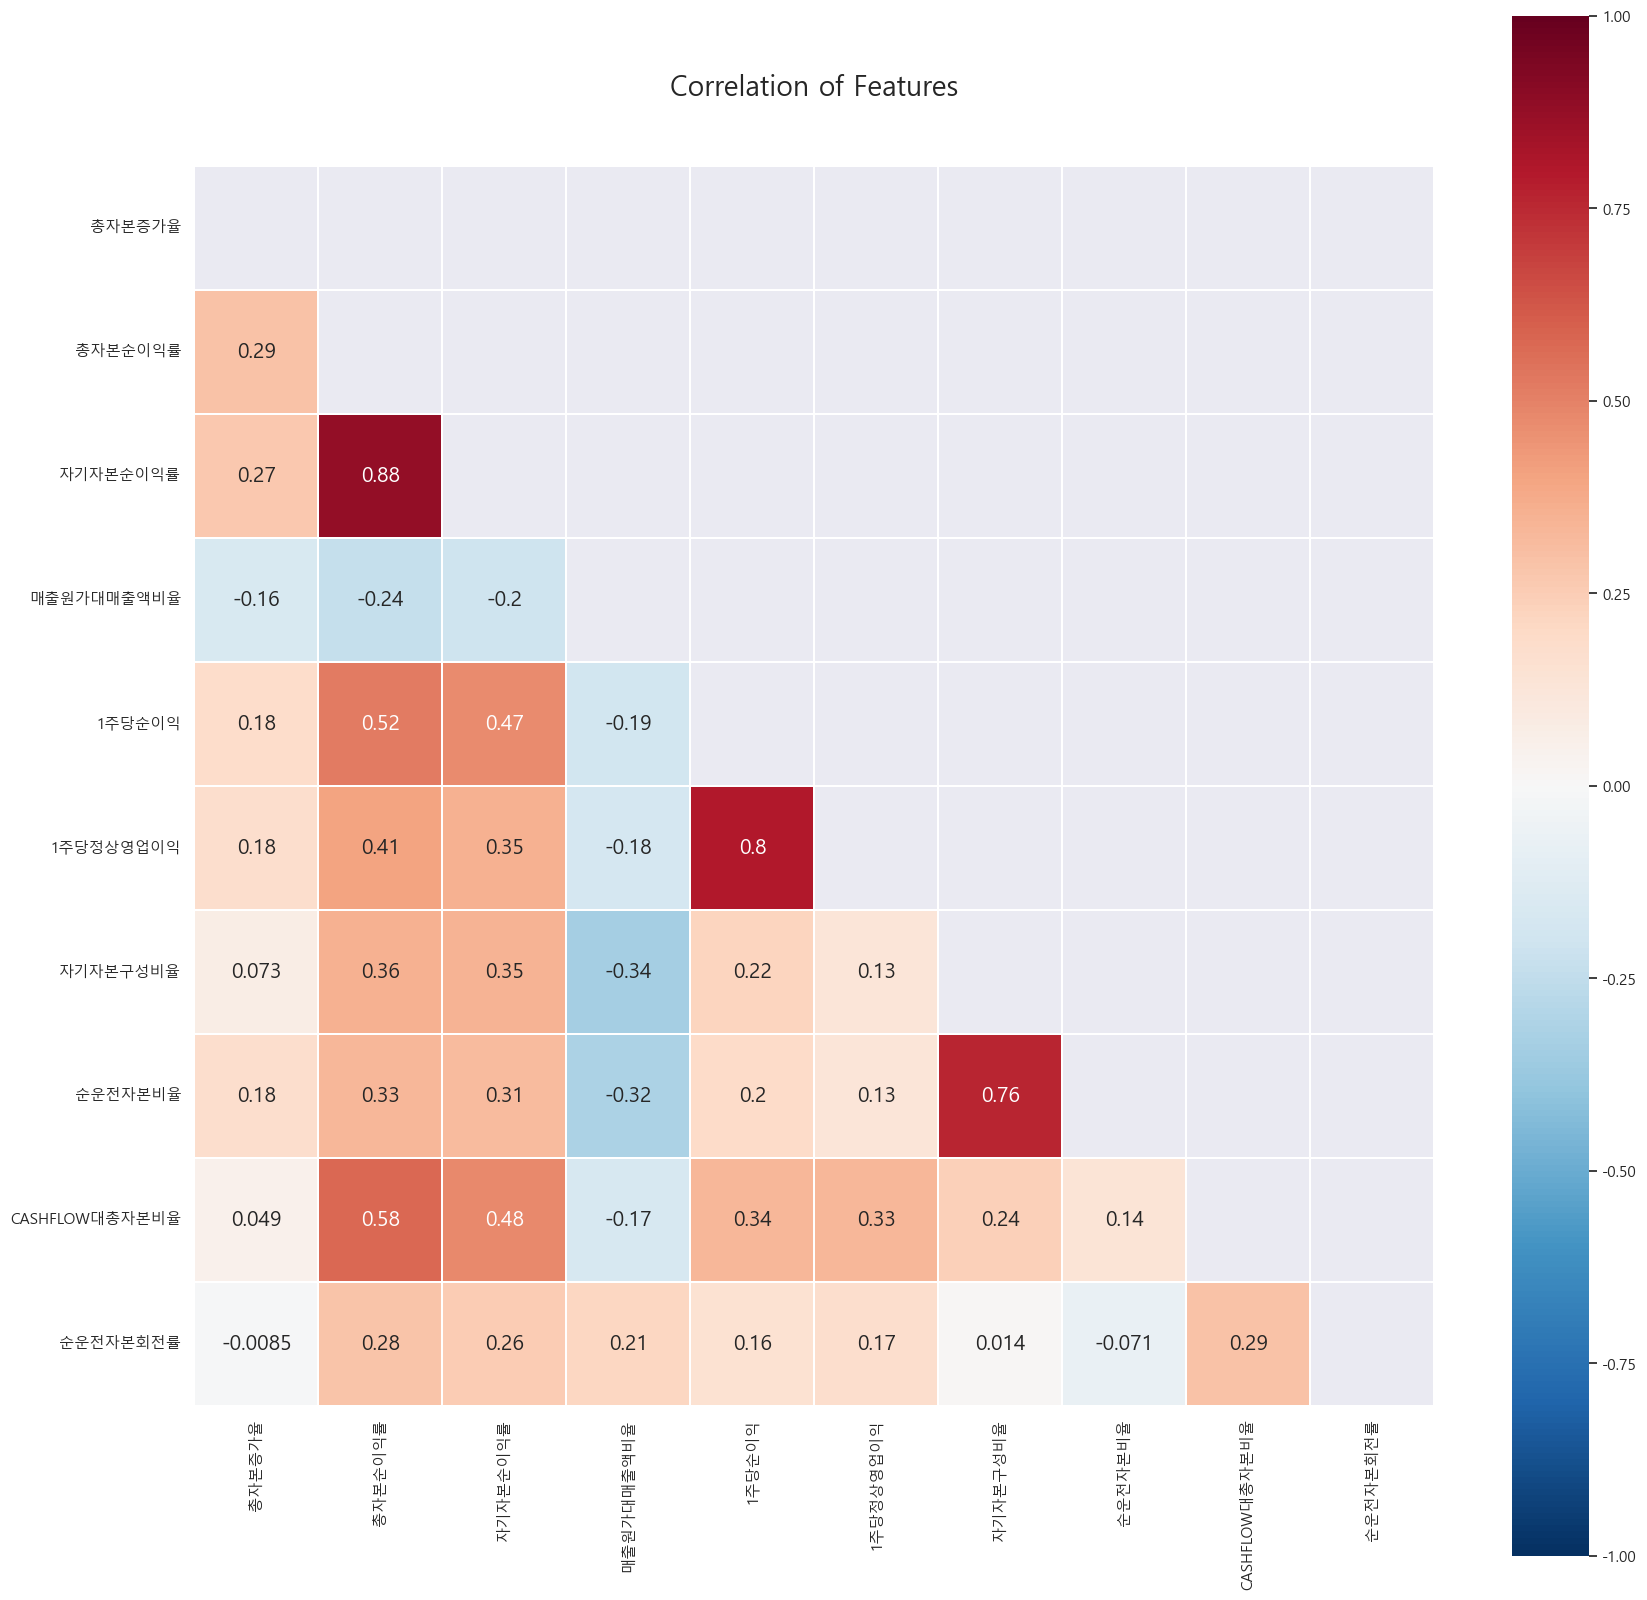

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = df_fs.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
plt.title("Correlation of Features", y = 1.05, size = 20)
sns.heatmap(df_fs.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap='RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 15})

# 코스닥 최종 피쳐
- '총자본증가율','총자본순이익률','자기자본순이익률','매출원가대매출액비율','1주당순이익','1주당정상영업이익','자기자본구성비율', '순운전자본비율','CASHFLOW대총자본비율','순운전자본회전률'

- 성장성 : 총자본증가율, 
- 수익성 : 총자본순이익률, 자기자본순이익률, 매출원가대매출액비율, 1주당순이익, 1주당정상영업이익
- 안정성 : 자기자본구성비율, 순운전자본비율, CASHFLOW대총자본비율	
- 활동성 : 순운전자본회전률